# 1. Perkenalan

## Nama :  Stefanus Dody Kristianto Wicaksono

#### 1.1 Gambaran Besar Dataset
Dataset ini mencakup 721 karakter game pokemon, yaitu nomor, nama, tipe pertama dan kedua, dan statistik dasar: HP, Serangan, Pertahanan, Serangan Khusus, Pertahanan Khusus, dan Kecepatan.

#### 1.2 Sumber Data
Dataset asli berasal dari data kaggle: https://www.kaggle.com/abcsds/pokemon

#### 1.3 Objective yang ingin dicapai
Objective yang ingin dicapai dalam dataset ini adalah melakukan analisis berdasarkan nilai "Hit Points" atau "Health" terakhir dari Pokemon

#### 1.4 Features
* #: ID for each pokemon
* Name: Name of each pokemon
* Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
* Type 2: Some pokemon are dual type and have 2
* Total: sum of all stats that come after this, a general guide to how strong a pokemon is
* HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
* Attack: the base modifier for normal attacks (eg. Scratch, Punch)
* Defense: the base damage resistance against normal attacks
* SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
* SP Def: the base damage resistance against special attacks
* Speed: determines which pokemon attacks first each round


# 2. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

melakukan import pustaka yang dibutuhkan dalam proses pengolahan data

# 3. Data Loading

In [2]:
df = pd.read_csv('Pokemon.csv')

Memuat dataset dari file "Pokemon.csv"

#### 3.1 loading dataset

In [3]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Menampilkan 10 baris teratas dari dataset Pokemon

In [4]:
df.tail(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


Menampilkan 10 baris dataset terbawah

In [5]:
df.shape

(800, 13)

Dataset terdiri atas 800 baris dan 13 kolom

In [6]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


melihat deskripsi statistik dari dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


melihat informasi mengenai type data dari dataset dan dari info dapat terlihat bahwa Column **"Type 2"** memiliki data yang hilang

#### 3.2 Exploring Dataset

In [8]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


melihat 5 baris awal dari dataset

In [9]:
df['Total'].max()

780

melihat nilai tertinggi dari **total power** adalah **780**

In [10]:
df.loc[df['Total'] == df['Total'].max(),'Name']

163      MewtwoMega Mewtwo X
164      MewtwoMega Mewtwo Y
426    RayquazaMega Rayquaza
Name: Name, dtype: object

Dari dataset terlihat bahwa pokemon **total power terbesar** adalah **MewtwoMega Mewtwo X, MewtwoMega Mewtwo Y, dan RayquazaMega Rayquaza** dengan Total kekuatan **780**

In [11]:
df['Total'].min()

180

melihat nilai terendah dari **total power** adalah **180**

In [12]:
df.loc[df['Total'] == df['Total'].min(),'Name']

206    Sunkern
Name: Name, dtype: object

Dari dataset terlihat bahwa pokemon dengan **total power terkecil** adalah **Sunkern** dengan Total kekuatan **180**

In [13]:
df['HP'].max()

255

melihat **Hit points atau posisi Health** tertinggi adalah 255

In [14]:
df.loc[df['HP'] == df['HP'].max(),'Name']

261    Blissey
Name: Name, dtype: object

Dari dataset terlihat bahwa Pokemon **Blissey** merupakan pokemon dengan **Hit Point tertinggi**

In [15]:
df['HP'].min()

1

melihat **Hit points atau posisi Health** terendah adalah **1**

In [16]:
df.loc[df['HP'] == df['HP'].min(),'Name']

316    Shedinja
Name: Name, dtype: object

Dari dataset terlihat bahwa Pokemon **Shedinja** merupakan pokemon dengan **Hit Point terendah**

In [17]:
df['Defense'].max()

230

melihat nilai **defense tertinggi** adalah **230**

In [18]:
df.loc[df['Defense'] == df['Defense'].max(),'Type 1']

224    Steel
230      Bug
333    Steel
Name: Type 1, dtype: object

Dari Dataset terlihat bahwa Pokemon yang memiliki Type **Steel dan Bug** memiliki **Pertahanan terbaik**

In [19]:
df['Attack'].max()

190

melihat nilai **Attack tertinggi** adalah **190**

In [20]:
df.loc[df['Attack'] == df['Attack'].max(),'Type 1']

163    Psychic
Name: Type 1, dtype: object

Dari Dataset terlihat bahwa Pokemon yang memiliki Type **Psychic** memiliki **Penyerangan terbaik**

In [21]:
df['Sp. Atk'].max()

194

melihat nilai **Spesial Attack** tertinggi adalah **194**

In [22]:
df.loc[df['Sp. Atk'] == df['Sp. Atk'].max(),'Type 1']

164    Psychic
Name: Type 1, dtype: object

Dari Dataset terlihat bahwa Pokemon yang memiliki Type **Psychic** memiliki **Special Attack terbaik**

In [23]:
df['Sp. Def'].max()

230

melihat nilai **special defence** terbaik adalah **230**

In [24]:
df.loc[df['Sp. Def'] == df['Sp. Def'].max(),'Type 1']

230    Bug
Name: Type 1, dtype: object

Dari Dataset terlihat bahwa Pokemon yang memiliki Type **Bug** memiliki  **spesial defence** terbaik dalam menghadapi serangan spesial lawan

In [25]:
df['Speed'].max()

180

melihat nilai **Speed** terbaik adalah **180**

In [26]:
df.loc[df['Speed'] == df['Speed'].max(),'Type 1']

431    Psychic
Name: Type 1, dtype: object

Dari Dataset terlihat bahwa Pokemon yang memiliki Type **Psychic** merupakan jenis Pokemon yang akan menyerang lebih dulu setiap putaran

In [27]:
df['Speed'].min()

5

melihat nilai **Speed** terendah adalah **5**

In [28]:
df.loc[df['Speed'] == df['Speed'].min(),'Type 1']

230       Bug
495    Normal
Name: Type 1, dtype: object

Dari Dataset terlihat bahwa Pokemon yang memiliki Type **Bug dan Normal** merupakan jenis Pokemon yang akan menyerang paling akhir dalam setiap putaran

## 4. Data Cleaning

#### 4.1 Memberi nama baru untuk kolom

In [29]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

melakukan pengecekan untuk seluruh nama columns

In [30]:
df = df.rename(
  columns={'#': "ID", "Name": "Pokemon", "Type 1": "Main Type", 'Type 2': "Second Type", 'Total': "Full Power", "HP": "Hit Points", "Sp. Atk": "Special Attack", "Sp. Def": "Special Defense"}
)

melakukan perubahan nama kolom: 
* '#' menjadi "ID", 
* "Name" menjadi "Pokemon", 
* "Type 1" menjadi "Main Type",
* 'Type 2' menjadi "Second Type", 
* 'Total' menjadi "Full Power", 
* "HP" menjadi "Hit Points", 
* "Sp. Atk" menjadi "Special Attack", 
* "Sp. Def" menjadi "Special Defense"

In [31]:
df.head()

,ID,Pokemon,Main Type,Second Type,Full Power,Hit Points,Attack,Defense,Special Attack,Special Defense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


melakukan pengecekan 5 baris awal dari dataset setelah dilakukan proses perubahan nama kolom

#### 4.2 Missing Values

In [32]:
df.isna().sum()

ID                   0
Pokemon              0
Main Type            0
Second Type        386
Full Power           0
Hit Points           0
Attack               0
Defense              0
Special Attack       0
Special Defense      0
Speed                0
Generation           0
Legendary            0
dtype: int64

terdapat sejumlah **386** data hilang pada kolom **"Second Type"** dalam dataset

In [33]:
df.isnull().mean()

ID                 0.0000
Pokemon            0.0000
Main Type          0.0000
Second Type        0.4825
Full Power         0.0000
Hit Points         0.0000
Attack             0.0000
Defense            0.0000
Special Attack     0.0000
Special Defense    0.0000
Speed              0.0000
Generation         0.0000
Legendary          0.0000
dtype: float64

Persentase data hilang untuk column **"Second Type"** adalah sebesar **48,25%**

In [34]:
df['Second Type'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

Data hilang untuk column **"Second Type"** termasuk **Standar Missing Values** karena nilai yang hilang ditandai dengan **"nan"**

In [35]:
df['Second Type'].fillna('Missing', inplace=True)

Dalam pengisian data hilang untuk column **"Second Type"**, digunakan **"Missing"** karena persentase nilai yang hilang cukup signifikan yaitu sebesar **48,25%** 

In [36]:
df.isna().sum()

ID                 0
Pokemon            0
Main Type          0
Second Type        0
Full Power         0
Hit Points         0
Attack             0
Defense            0
Special Attack     0
Special Defense    0
Speed              0
Generation         0
Legendary          0
dtype: int64

melakukan pengecekan kembali jumlah data hilang dalam dataset setelah dilakukan proses pengisian untuk data yang hilang

#### 4.3 Menghapus kolom yang tidak dipakai

In [37]:
# membuat variabel data columns yang akan dihapus
del_columns = ['Generation', 'Legendary']

# menghapus columns yang tidak dipakai
df.drop(del_columns, inplace=True, axis=1)

untuk Feature yang dihilangkan adalah Feature **"Generation"** dan **"Legendary"**

In [38]:
df

,ID,Pokemon,Main Type,Second Type,Full Power,Hit Points,Attack,Defense,Special Attack,Special Defense,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,Missing,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80


melihat dataset setelah menghapus columns yang tidak terpakai, terlihat bahwa jumlah kolom berkurang dari 13 kolom menjadi 11 kolom

## 5. Explorasi Data

Dalam melakukan Explorasi data ini akan dilakukan pembagian untuk feature **"Hit Points"** menjadi 3 yaitu **"High"** , **Medium**, dan **"Low"** berdasarkan nilai quantile dari Features tersebut. 

Pembagian kategori tersebut untuk melihat **"Hit Points"** atau health terakhir dari setiap pokemon

In [39]:
# nilai 'High' feature "Hit Points"
df['Hit Points'].quantile([0.75])

0.75    80.0
Name: Hit Points, dtype: float64

In [40]:
# nilai 'Low' feature "Hit Points"
df['Hit Points'].quantile([0.25])

0.25    50.0
Name: Hit Points, dtype: float64

Dari nilai quantile diatas maka pembagian kategori untuk feature "Hit Points" adalah sebagai berikut:
* untuk kategori **high_hit** adalah nilai "Hit Points" diatas **80**
* untuk kategori **medium_hit** adalah nilai "Hit Points" antara nilai **51 s/d 79**
* untuk kategori **low_hit** adalah nilai "Hit Points" antara nilai **dibawah 50**

#### 5.1 Query

In [41]:
df

,ID,Pokemon,Main Type,Second Type,Full Power,Hit Points,Attack,Defense,Special Attack,Special Defense,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,Missing,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80


In [42]:
# melakukan query data kategori high_hit untuk nilai feature "Hit Points" dengan nilai diatas 80 
high_hit = df.loc[df['Hit Points'] >= 80]
high_hit

,ID,Pokemon,Main Type,Second Type,Full Power,Hit Points,Attack,Defense,Special Attack,Special Defense,Speed
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
22,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121
36,31,Nidoqueen,Poison,Ground,505,90,92,87,75,85,76
...,...,...,...,...,...,...,...,...,...,...,...
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80


terdapat **236** pokemon yang masuk dalam kategori **"High Hit"**

In [43]:
# melakukan query data kategori medium_hit untuk nilai feature "Hit Points" dengan nilai antara 51 s/d 79
medium_hit = df.loc[(df['Hit Points'] > 50) & (df['Hit Points'] < 80)]
medium_hit

,ID,Pokemon,Main Type,Second Type,Full Power,Hit Points,Attack,Defense,Special Attack,Special Defense,Speed
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
5,5,Charmeleon,Fire,Missing,405,58,64,58,80,65,80
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100
...,...,...,...,...,...,...,...,...,...,...,...
783,710,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41
784,711,GourgeistAverage Size,Ghost,Grass,494,65,90,122,58,75,84
785,711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99
786,711,GourgeistLarge Size,Ghost,Grass,494,75,95,122,58,75,69


terdapat **353** pokemon yang masuk dalam kategori **"Medium Hit"**

In [44]:
# melakukan query data kategori low_hit untuk nilai feature "Hit Points" dengan nilai dibawah 50 
low_hit = df.loc[df['Hit Points'] <= 50 ]
low_hit

,ID,Pokemon,Main Type,Second Type,Full Power,Hit Points,Attack,Defense,Special Attack,Special Defense,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
4,4,Charmander,Fire,Missing,309,39,52,43,60,50,65
9,7,Squirtle,Water,Missing,314,44,48,65,50,64,43
13,10,Caterpie,Bug,Missing,195,45,30,35,20,20,45
14,11,Metapod,Bug,Missing,205,50,20,55,25,25,30
...,...,...,...,...,...,...,...,...,...,...,...
780,710,PumpkabooAverage Size,Ghost,Grass,335,49,66,70,44,55,51
781,710,PumpkabooSmall Size,Ghost,Grass,335,44,66,70,44,55,56
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50


terdapat **211** pokemon yang masuk dalam kategori **"Low Hit"**

#### 5.2 Grouping

In [45]:
# membuat grouping High hit points untuk melihat jumlah "Main Type" pokemon dengan nilai diatas 80 
high_hit.groupby("Main Type", sort=False)["Hit Points"].count()

Main Type
Grass       17
Normal      38
Poison       9
Fairy        7
Water       41
Fire        14
Fighting     7
Rock        12
Psychic     17
Ground      15
Ice         10
Electric     6
Dragon      18
Dark         6
Bug          6
Steel        6
Ghost        6
Flying       1
Name: Hit Points, dtype: int64

Dari pengelompokan data, Pokemon dengan kategori High Hit Point dengan jumlah terbanyak adalah jenis pokemon **Water** dengan jumlah sebanyak **41**

In [46]:
# membuat grouping Medium hit points untuk melihat jumlah "Main Type" pokemon dengan nilai antara 51 s/d 79
medium_hit.groupby("Main Type", sort=False)["Hit Points"].count()

Main Type
Grass       35
Fire        27
Water       43
Bug         36
Normal      41
Poison      11
Electric    21
Ground       9
Fairy        7
Fighting    12
Psychic     25
Rock        19
Ghost       14
Ice          9
Dragon      10
Dark        17
Steel       15
Flying       2
Name: Hit Points, dtype: int64

Dari pengelompokan data, Pokemon dengan kategori Medium Hit Point dengan jumlah terbanyak adalah jenis pokemon **Water** dengan jumlah sebanyak **43**

In [47]:
# membuat grouping Low hit points untuk melihat jumlah "Main Type" pokemon dengan nilai dibawah 50 
low_hit.groupby("Main Type", sort=False)["Hit Points"].count()

Main Type
Grass       18
Fire        11
Water       28
Bug         27
Normal      19
Poison       8
Electric    17
Ground       8
Fighting     8
Psychic     15
Rock        13
Ghost       12
Dragon       4
Fairy        3
Ice          5
Dark         8
Steel        6
Flying       1
Name: Hit Points, dtype: int64

Dari pengelompokan data, Pokemon dengan kategori Medium Hit Point dengan jumlah terbanyak adalah jenis pokemon **Water** dengan jumlah sebanyak **28**

#### 5.3 Visualisasi 

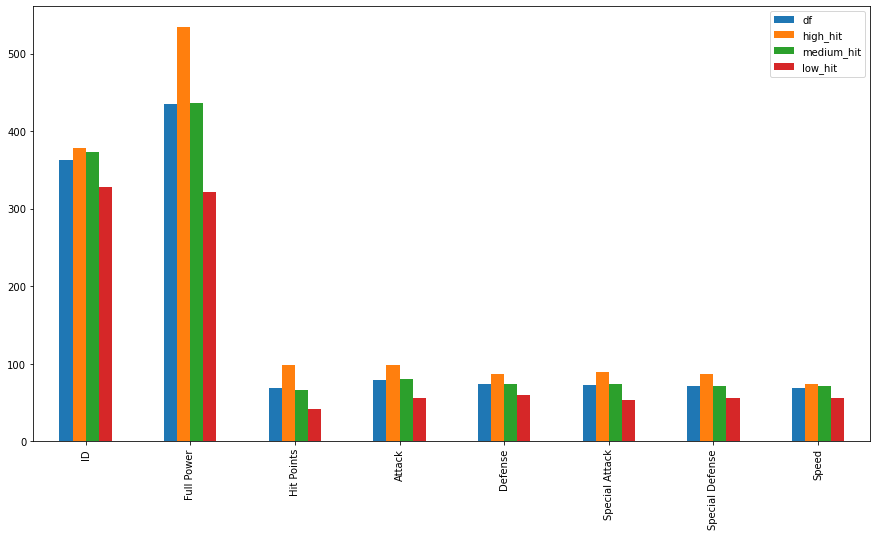

In [48]:
# membuat hit_points dataframe yang menjelaskan mengenai nilai rata-rata(mean) keseluruhan
hit_points = pd.DataFrame({"df": df.mean(),
                     "high_hit": high_hit.mean(),
                     "medium_hit": medium_hit.mean(),
                     "low_hit": low_hit.mean()
                    })

# visualisasi data frame
hit_points.plot(kind='bar', figsize=(15,8));

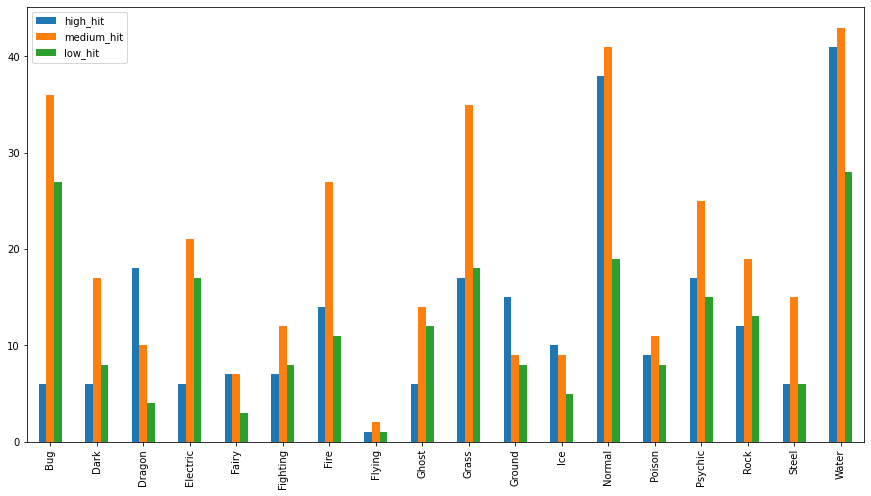

In [49]:
# membuat hit_points_type dataframe yang menjelaskan "Main Type" Pokemon dari tiap kategori
hit_points_type = pd.DataFrame({
                     "high_hit": high_hit.groupby("Main Type", sort=False)["Hit Points"].count(),
                     "medium_hit": medium_hit.groupby("Main Type", sort=False)["Hit Points"].count(),
                     "low_hit": low_hit.groupby("Main Type", sort=False)["Hit Points"].count()
                    })

# melakukan visualisasi dataframe
hit_points_type.plot(kind='bar', figsize=(15,8));

Dari hasil visualisasi terlihat bahwa Pokemon dengan **"Main Type": Water** adalah jenis yang paling banyak terdapat didalam kategori **high_hit, medium_hit dan low_hit**

## 6. Pengambilan Keputusan

In [50]:
# menampilkan hit_points 
hit_points

,df,high_hit,medium_hit,low_hit
ID,362.81375,378.029661,373.257790,328.322275
Full Power,435.10250,534.224576,436.702550,321.559242
Hit Points,69.25875,98.851695,65.662890,42.175355
Attack,79.00125,98.665254,79.804533,55.663507
Defense,73.84250,86.368644,74.107649,59.388626
Special Attack,72.82000,89.122881,73.685552,53.137441
Special Defense,71.90250,86.817797,71.569405,55.777251
Speed,68.27750,74.398305,71.872521,55.417062


Data diatas menjelaskan mengenai:

* df = nilai rata-rata(mean) dari tiap features
* high_hit = nilai rata-rata(mean) dari kategori "Hit Points" dengan nilai diatas 80
* medium_hit = nilai rata-rata(mean) dari kategori "Hit Points" dengan nilai antara 51 s/d 79
* low_hit = nilai rata-rata(mean) dari kategori "Hit Points" dengan nilai dibawah 50 

## Analysis Keseluruhan

## 1. Analisis Kategori high_hit:

   - Kategori ini adalah analisis dengan mengkategorikan nilai akhir **"Hit Points" atau  Health** dari Pokemon dengan nilai diatas **80**
   - Dari analisis data ditemukan bahwa kategori **"high_hit"** akan memulai serangan pertama dalam setiap pertarungan, hal tersebut dapat terlihat dari nilai **"Speed"** sebesar **74.40** diatas nilai rata-rata keseluruhan **"Speed"** sebesar **"68.28"**
   - Dari analisis data, Pokemon dengan kategori **high_hit"** akan melakukan serangan pertama dalam setiap pertarungan **("Speed")** disebabkan karena:
       * Pokemon dengan kategori **high_hit** memiliki Kekuatan yang besar, hal tersebut data terlihat dari nilai rata-rata **"Full Power"** sebesar **534.22** diatas nilai rata-rata keseluruhan **"Full Power"** sebesar **435.10**
       * Pokemon dengan kategori **high_hit"** memiliki senjata penyerangan yang diatas rata-rata, hal tersebut dapat terlihat dari nilai rata-rata "Attack" sebesar **98.66** diatas nilai rata-rata keseluruhan "Attack" sebesar **79.00**, dan juga memiliki nilai rata-rata **"Special Attack"** sebesar **89.12** diatas nilai rata-rata **Special Attack** sebesar **72.82**
       * Pokemon dengan kategori **high_hit** memiliki senjata pertahanan yang diatas rata-rata, hal tersebut dapat terlihat dari nilai rata-rata **"Defense"** sebesar **86.37** diatas nilai rata-rata keseluruhan **"Defense"** sebesar **73.84** dan juga memiliki nilai rata **"Special Defense"** sebesar **86.82** diatas nilai rata-rata **Special Defense** sebesar **71.90**


## 2. Analisis Kategori medium_hit:

   - Analysis kategori ini adalah analisis dengan mengkategorikan nilai akhir **"Hit Points" atau nilai Health** dari Pokemon dengan nilai antara **51 sampai dengan 79**
   - Dari analisis data ditemukan bahwa kategori **"medium_hit"** tidak selalu memulai serangan pertama dalam setiap pertarungan, hal tersebut dapat terlihat dari nilai **"Speed"** sebesar **71.87** hampir sama dengan nilai rata-rata keseluruhan **"Speed"** sebesar **"68.28"**
   - Dari analisis data, Pokemon dengan kategori **medium_hit"** tidak selalu memulai serangan pertama dalam setiap pertarungan **("Speed")** disebabkan karena:
       * Pokemon dengan kategori **medium_hit** memiliki Kekuatan yang hampir sama dengan Kekuatan rata-rata pokemon, hal tersebut data terlihat dari nilai rata-rata **"Full Power"** sebesar **436.70** hampir sama dengan nilai rata-rata keseluruhan **"Full Power"** sebesar **435.10**
       * Pokemon dengan kategori **medium_hit"** memiliki senjata penyerangan yang hampir sama dengan nilai rata-rata senjata penyerangan, hal tersebut dapat terlihat dari nilai rata-rata "Attack" sebesar **79.80** hampir sama dengan nilai rata-rata keseluruhan "Attack" sebesar **79.00**, dan juga memiliki nilai rata-rata **"Special Attack"** sebesar **73.68** hampir sama dengan nilai rata-rata **Special Attack** sebesar **72.82**
       * Pokemon dengan kategori **medium_hit** memiliki senjata pertahanan hampir sama dengan nilai rata-rata senjata pertahanan, hal tersebut dapat terlihat dari nilai rata-rata **"Defense"** sebesar **74.11** hampir sama dengan nilai rata-rata keseluruhan **"Defense"** sebesar **73.84** dan juga memiliki nilai rata **"Special Defense"** sebesar **71.56** hampir sama dengan nilai rata-rata **Special Defense** sebesar **71.90**

### 3. Analysis Kategori low_hit:
   
   - Analysis kategori low_hit ini adalah analisis dengan mengkategorikan nilai akhir **"Hit Points" atau nilai Health** dari Pokemon dengan nilai **dibawah 50**
   - Dari analisis data ditemukan bahwa kategori **"low_hit"** akan cenderung bertahan atau tidak memulai serangan pertama dalam setiap pertarungan, hal tersebut dapat terlihat dari nilai **"Speed"** sebesar **42.17** dibawah nilai rata-rata keseluruhan **"Speed"** sebesar **"68.28"**
   - Dari analisis data, Pokemon dengan kategori **low_hit"** akan cenderung bertahan atau tidak memulai memulai serangan pertama dalam setiap pertarungan **("Speed")** disebabkan karena:
       * Pokemon dengan kategori **low_hit** memiliki Kekuatan dibawah nilai Kekuatan rata-rata pokemon, hal tersebut data terlihat dari nilai rata-rata **"Full Power"** sebesar **321.55** dibawah nilai rata-rata keseluruhan **"Full Power"** sebesar **435.10**
       * Pokemon dengan kategori **low_hit"** memiliki senjata penyerangan dibawah nilai rata-rata senjata penyerangan, hal tersebut dapat terlihat dari nilai rata-rata "Attack" sebesar **55.66** dibawah nilai rata-rata keseluruhan "Attack" sebesar **79.00**, dan juga memiliki nilai rata-rata **"Special Attack"** sebesar **53.14** dibawah nilai rata-rata **Special Attack** sebesar **72.82**
       * Pokemon dengan kategori **low_hit** memiliki senjata pertahanan dibawah nilai rata-rata senjata pertahanan, hal tersebut dapat terlihat dari nilai rata-rata **"Defense"** sebesar **59.39** dibawah nilai rata-rata keseluruhan **"Defense"** sebesar **73.84** dan juga memiliki nilai rata **"Special Defense"** sebesar **55.78** dibawah nilai rata-rata **Special Defense** sebesar **71.90**

## Pengambilan keputusan :

- Apabila memiliki Pokemon dengan nilai features **"Full Power"** diatas **534.22** sebaiknya menerapkan strategi untuk mengambil inisiatif menyerang terlebih dahulu karena dari data terlihat bahwa Pokemon dengan nilai features **"Full Power"** tersebut memiliki nilai features **"Hit Points" atau  Health** akhir diatas rata-rata

- Apabila memiliki Pokemon dengan nilai features **"Full Power"** diantara **534.22** sampai dengan **321.55** sebaiknya menerapkan strategi untuk melihat situasi dengan mempertimbangkan kekuatan dari Pokemon lawan, hal terlihat bahwa Pokemon dengan nilai features **"Full Power"** tersebut memiliki **"Hit Points" atau  Health** akhir hampir sama dengan nilai rata-rata

- Apabila memiliki Pokemon dengan nilai features **"Full Power"** dibawah **321.55** sebaiknya menerapkan strategi bertahan dan tidak melakukan penyerangan terlebih dahulu, hal terlihat bahwa Pokemon dengan nilai features **"Full Power"** tersebut memiliki **"Hit Points" atau  Health** akhir dibawah nilai rata-rata